In [8]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

In [9]:
injury = pd.read_csv('InjuryRecord.csv')
tracking = pd.read_csv('PlayerTrackData.csv')
playlist = pd.read_csv('PlayList.csv')

In [10]:
total = pd.merge(playlist, injury, on='PlayKey',how='left')

In [11]:
final = pd.merge(total, tracking, on='PlayKey',how='left')

In [12]:
del injury
del tracking
del playlist
del total

In [13]:
final['DM_M1'] = final['DM_M1'].fillna(0).astype(int)
final['DM_M7'] = final['DM_M7'].fillna(0).astype(int)
final['DM_M28'] = final['DM_M28'].fillna(0).astype(int)
final['DM_M42'] = final['DM_M42'].fillna(0).astype(int)

In [14]:
stadium_name = final.StadiumType.unique()
print(len(stadium_name))
# printing the list using * and sep operator 
print("printing lists separated by commas") 
  
print(*stadium_name, sep = "/") 

30
printing lists separated by commas
Outdoor/Indoors/Oudoor/Outdoors/Open/Closed Dome/Domed, closed/nan/Dome/Indoor/Domed/Retr. Roof-Closed/Outdoor Retr Roof-Open/Retractable Roof/Ourdoor/Indoor, Roof Closed/Retr. Roof - Closed/Bowl/Outddors/Retr. Roof-Open/Dome, closed/Indoor, Open Roof/Domed, Open/Domed, open/Heinz Field/Cloudy/Retr. Roof - Open/Retr. Roof Closed/Outdor/Outside


In [15]:
#Similar word array
array_outdoors = ["Outdoor","Oudoor", "Outdoors", "Ourdoor", "Outddors", "Outdor", "Heinz Field", "Cloudy", 
                  "nan", "Outside", "Bowl"]
array_indoors = ["Indoors", "indoor", "Retractable Roof", "Indoor, Roof Closed"]
array_open = ["Open", "Retr Roof-Open", "Retr. Roof-Open", "open roof", "Indoor, Open Roof", 
               "open","Retr. roof -Open", "Domed, Open", "Domed, open", "Retr. Roof - Open"]
array_closed = ["Closed Dome", "Dome, closed", "dome", "Domed", "Retr. Roof-closed", 
                "bowl", "closed", "Retr. Roof Closed", "Retr. Roof-Closed", "Domed, closed", "Dome",
                "Retr. Roof - Closed"]

In [16]:
final["StadiumType"] = final["StadiumType"].replace(array_outdoors, "outdoors" )
final["StadiumType"] = final["StadiumType"].replace(array_indoors, "indoors" )
final["StadiumType"] = final["StadiumType"].replace(array_open, "open" )
final["StadiumType"] = final["StadiumType"].replace(array_closed, "closed" )

In [17]:
weather = final.Weather.unique()
print(len(weather))
# printing the list using * and sep operator 
print("printing lists separated by commas") 
  
print(*weather, sep = "/") 

64
printing lists separated by commas
Clear and warm/Mostly Cloudy/Sunny/Clear/Cloudy/Cloudy, fog started developing in 2nd quarter/Rain/Partly Cloudy/Mostly cloudy/Cloudy and cold/Cloudy and Cool/Rain Chance 40%/Controlled Climate/Sunny and warm/Partly cloudy/Clear and Cool/Clear and cold/Sunny and cold/Indoor/nan/Partly Sunny/N/A (Indoors)/Mostly Sunny/Indoors/Clear Skies/Partly sunny/Showers/N/A Indoor/Sunny and clear/Snow/Scattered Showers/Party Cloudy/Clear skies/Rain likely, temps in low 40s./Hazy/Partly Clouidy/Sunny Skies/Overcast/Cloudy, 50% change of rain/Fair/Light Rain/Partly clear/Mostly Coudy/10% Chance of Rain/Cloudy, chance of rain/Heat Index 95/Sunny, highs to upper 80s/Sun & clouds/Heavy lake effect snow/Mostly sunny/Cloudy, Rain/Sunny, Windy/Mostly Sunny Skies/Rainy/30% Chance of Rain/Cloudy, light snow accumulating 1-3"/cloudy/Clear and Sunny/Coudy/Clear and sunny/Clear to Partly Cloudy/Cloudy with periods of rain, thunder possible. Winds shifting to WNW, 10-20 mph.

In [18]:
cloudy = ["Cloudy", "Cloudy, fog started developing in 2nd quarter", "Partly Cloudy", "Mostly Cloudy", "Mostly cloudy", "Cloudy and cold",
          "Cloudy and Cool", "Partly cloudy", "Party Cloudy", "Partly Clouidy", "Cloudy, 50% change of rain", 
          "Mostly Coudy", "Cloudy, chance of rain", "Cloudy, Rain", "Cloudy, light snow accumulating 1-3""","cloudy", "Coudy", "Cloudy with periods of rain, thunder possible", "Winds shifting to WNW, 10-20 mph.", 
         "Cold", "Overcast", "Hazy", "Cloudy with periods of rain, thunder possible. Winds shifting to WNW, 10-20 mph.",
         "Snow"]
rain = ["Rain", "Rain Chance 40%", "Showers", "Scattered Showers", "Rain likely, temps in low 40s.", "Light Rain", 
        "10% Chance of Rain", "Rain shower", "Heavy lake effect snow", "Rainy"]
clear = ["Clear and warm", "Sunny", "Clear", "Sunny and warm", "Clear and Cool", "Clear and cold", "Sunny and cold", 
         "nan", "Partly Sunny", "Mostly Sunny", "Clear Skies", "Partly sunny", "Sunny and clear", "Clear skies", 
         "Sunny Skies", "Fair", "Partly clear", "Heat Index 95", "Sunny, highs to upper 80s", "Sun & clouds", 
         "Mostly sunny", "Sunny, Windy", "Mostly Sunny Skies", "Clear and Sunny", "Clear and sunny", 
         "Clear to Partly Cloudy"]
indoor = ["Indoor", "N/A (Indoors)", "Indoors", "N/A Indoor", "Controlled Climate"]

In [19]:
final["Weather"] = final["Weather"].replace(cloudy, "cloudy" )
final["Weather"] = final["Weather"].replace(rain, "rain" )
final["Weather"] = final["Weather"].replace(clear, "clear" )
final["Weather"] = final["Weather"].replace(indoor, "indoor" )

In [20]:
final.columns

Index(['PlayerKey_x', 'GameID_x', 'PlayKey', 'RosterPosition', 'PlayerDay',
       'PlayerGame', 'StadiumType', 'FieldType', 'Temperature', 'Weather',
       'PlayType', 'PlayerGamePlay', 'Position', 'PositionGroup',
       'PlayerKey_y', 'GameID_y', 'BodyPart', 'Surface', 'DM_M1', 'DM_M7',
       'DM_M28', 'DM_M42', 'time', 'event', 'x', 'y', 'dir', 'dis', 'o', 's'],
      dtype='object')

In [21]:
final.head()

,PlayerKey_x,GameID_x,PlayKey,RosterPosition,PlayerDay,PlayerGame,StadiumType,FieldType,Temperature,Weather,...,DM_M28,DM_M42,time,event,x,y,dir,dis,o,s
0,26624,26624-1,26624-1-1,Quarterback,1,1,outdoors,Synthetic,63,clear,...,0,0,0.0,huddle_start_offense,87.46,28.93,288.24,0.01,262.33,0.13
1,26624,26624-1,26624-1-1,Quarterback,1,1,outdoors,Synthetic,63,clear,...,0,0,0.1,NaN,87.45,28.92,283.91,0.01,261.69,0.12
2,26624,26624-1,26624-1-1,Quarterback,1,1,outdoors,Synthetic,63,clear,...,0,0,0.2,NaN,87.44,28.92,280.40,0.01,261.17,0.12
3,26624,26624-1,26624-1-1,Quarterback,1,1,outdoors,Synthetic,63,clear,...,0,0,0.3,NaN,87.44,28.92,278.79,0.01,260.66,0.10
4,26624,26624-1,26624-1-1,Quarterback,1,1,outdoors,Synthetic,63,clear,...,0,0,0.4,NaN,87.44,28.92,275.44,0.01,260.27,0.09


In [22]:
#drop the irrelevant columns
complete = final.drop(columns=['PlayerKey_x','PlayerGame', 'PlayerDay','GameID_x', 'PositionGroup', 'BodyPart', 'event', 'PlayKey', 'PlayerKey_y', 'RosterPosition', 'GameID_y', 'Surface', 'DM_M7', 'DM_M28', 'DM_M42'])

In [23]:
del final

In [24]:
complete.isna().sum()

StadiumType       4776082
FieldType               0
Temperature             0
Weather           5454450
PlayType           173796
PlayerGamePlay          0
Position                0
DM_M1                   0
time                   45
x                      45
y                      45
dir                    47
dis                    45
o                      47
s                      45
dtype: int64

In [25]:
complete.dropna(inplace = True)

In [26]:
complete = pd.get_dummies(complete, columns = ['PlayType', 'Position', 'StadiumType', 'FieldType', 'Weather'], dummy_na = True, drop_first = True)

In [27]:
complete.head()

,Temperature,PlayerGamePlay,DM_M1,time,x,y,dir,dis,o,s,...,StadiumType_outdoors,StadiumType_nan,FieldType_Synthetic,FieldType_nan,"Weather_Cloudy, light snow accumulating 1-3""",Weather_clear,Weather_cloudy,Weather_indoor,Weather_rain,Weather_nan
0,63,1,0,0.0,87.46,28.93,288.24,0.01,262.33,0.13,...,1,0,1,0,0,1,0,0,0,0
1,63,1,0,0.1,87.45,28.92,283.91,0.01,261.69,0.12,...,1,0,1,0,0,1,0,0,0,0
2,63,1,0,0.2,87.44,28.92,280.40,0.01,261.17,0.12,...,1,0,1,0,0,1,0,0,0,0
3,63,1,0,0.3,87.44,28.92,278.79,0.01,260.66,0.10,...,1,0,1,0,0,1,0,0,0,0
4,63,1,0,0.4,87.44,28.92,275.44,0.01,260.27,0.09,...,1,0,1,0,0,1,0,0,0,0


In [28]:
complete.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66227077 entries, 0 to 76367082
Data columns (total 56 columns):
Temperature                                     int64
PlayerGamePlay                                  int64
DM_M1                                           int64
time                                            float64
x                                               float64
y                                               float64
dir                                             float64
dis                                             float64
o                                               float64
s                                               float64
PlayType_Extra Point                            uint8
PlayType_Field Goal                             uint8
PlayType_Kickoff                                uint8
PlayType_Kickoff Not Returned                   uint8
PlayType_Kickoff Returned                       uint8
PlayType_Pass                                   uint8
PlayTyp

In [193]:
complete = complete.sample(frac = 0.05)

In [194]:
complete.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 165568 entries, 16175221 to 18299369
Data columns (total 58 columns):
Temperature                                     165568 non-null int64
PlayerGamePlay                                  165568 non-null int64
DM_M1                                           165568 non-null int64
time                                            165568 non-null float64
x                                               165568 non-null float64
y                                               165568 non-null float64
dir                                             165568 non-null float64
dis                                             165568 non-null float64
o                                               165568 non-null float64
s                                               165568 non-null float64
PlayType_Extra Point                            165568 non-null uint8
PlayType_Field Goal                             165568 non-null uint8
PlayType_Kickoff          

In [165]:
complete.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3311354 entries, 33700483 to 8017251
Data columns (total 58 columns):
Temperature                                     int64
PlayerGamePlay                                  int64
DM_M1                                           int64
time                                            float64
x                                               float64
y                                               float64
dir                                             float64
dis                                             float64
o                                               float64
s                                               float64
PlayType_Extra Point                            uint8
PlayType_Field Goal                             uint8
PlayType_Kickoff                                uint8
PlayType_Kickoff Not Returned                   uint8
PlayType_Kickoff Returned                       uint8
PlayType_Pass                                   uint8
Pl

In [174]:
complete.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3311354 entries, 33700483 to 8017251
Data columns (total 58 columns):
Temperature                                     int64
PlayerGamePlay                                  int64
DM_M1                                           int64
time                                            float64
x                                               float64
y                                               float64
dir                                             float64
dis                                             float64
o                                               float64
s                                               float64
PlayType_Extra Point                            uint8
PlayType_Field Goal                             uint8
PlayType_Kickoff                                uint8
PlayType_Kickoff Not Returned                   uint8
PlayType_Kickoff Returned                       uint8
PlayType_Pass                                   uint8
Pl

In [195]:
# split into X and Y
Y = complete['DM_M1']
X = complete.drop(columns=['DM_M1', 'PlayType_nan', 'Position_nan', 'StadiumType_nan', 'FieldType_nan', 
                        'Weather_Cloudy, light snow accumulating 1-3"', 'Weather_nan', 'Acceleration', 'Angle_Diff' ])

In [196]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [197]:
import xgboost as xgb

In [198]:
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

In [199]:
from sklearn.metrics import roc_auc_score

In [201]:
xg = xgb.XGBClassifier(objective='binary:logistic', random_state=0).fit(X_train, Y_train)
y_scores_xg = xg.predict_proba(X_test)[:,1]

print("Train Accuracy:",xg.score(X_train, Y_train))
print("Test Accuracy:", xg.score(X_test, Y_test))
print("ROC AUC:", roc_auc_score(Y_test, y_scores_xg))

Train Accuracy: 0.999742301249839
Test Accuracy: 0.999758407421724
ROC AUC: 0.5532779952636413


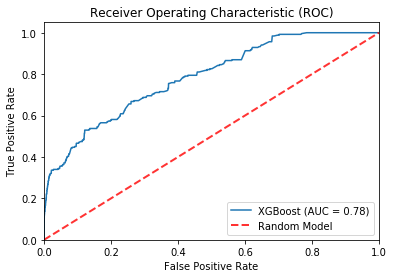

In [181]:
xg_roc_auc = roc_auc_score(Y_test, y_scores_xg)
fpr, tpr, thresholds = metrics.roc_curve(Y_test, y_scores_xg)
plt.plot(fpr, tpr, label='XGBoost (AUC = %0.2f)' % xg_roc_auc)
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Random Model', alpha=.8)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [182]:
import shap

In [183]:
explainer = shap.TreeExplainer(xg)

In [184]:
shap_values = explainer.shap_values(X_train)

In [185]:
shap.initjs()

In [186]:
shap.force_plot(explainer.expected_value, shap_values[0,:], X_train.iloc[0,:])

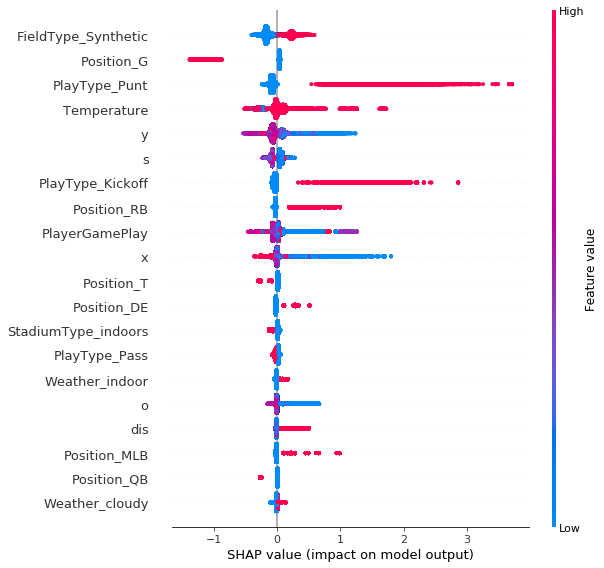

In [187]:
shap.summary_plot(shap_values, X_train)

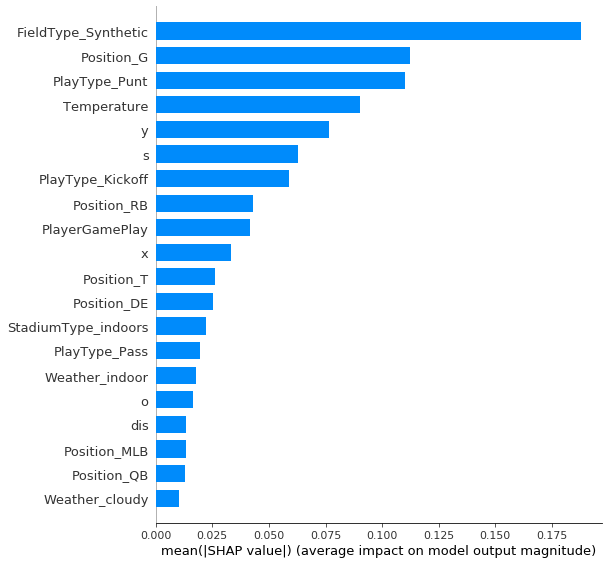

In [188]:
shap.summary_plot(shap_values, X_train, plot_type="bar")

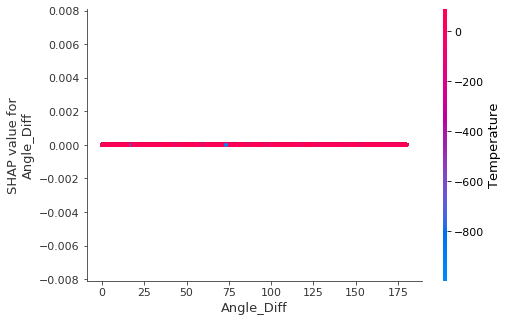

In [189]:
shap.dependence_plot("Angle_Diff", shap_values, X_train)

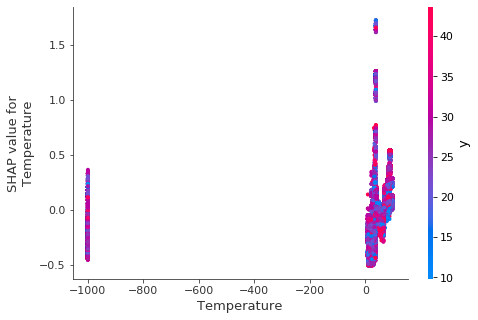

In [190]:
shap.dependence_plot("Temperature", shap_values, X_train)

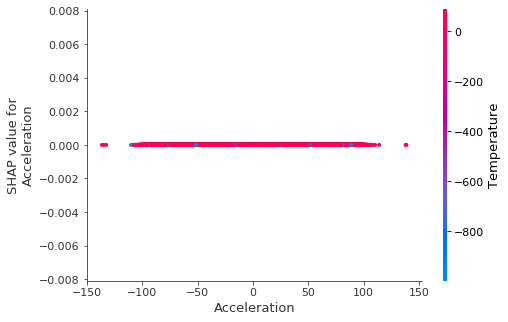

In [191]:
shap.dependence_plot("Acceleration", shap_values, X_train)

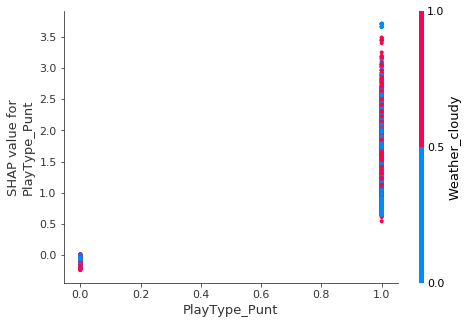

In [192]:
shap.dependence_plot("PlayType_Punt", shap_values, X_train)